# 馬登－朱利安震盪 (MJO) 氣候變異分析

## MJO相位圖 (Phase diagram)

先自己寫一個函數，繪製MJO相位圖的背景。

In [1]:
def plot_mjo_phase_space(figsize):
    
    import numpy as np
    from matplotlib import pyplot as plt
    import matplotlib.lines as lines
    
    fig, ax = plt.subplots(1,1,figsize=figsize) 
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_xticks(range(-4,5))
    ax.set_yticks(range(-4,5))

    # plot mjo phase diagram lines
    line1 = lines.Line2D([np.cos(np.pi/4), 4], [np.sin(np.pi/4), 4], color='black', linestyle='--', lw=1)
    ax.add_line(line1)
        
    line2 = lines.Line2D([np.cos(3*np.pi/4), -4], [np.sin(np.pi/4), 4], color='black', linestyle='--', lw=1)
    ax.add_line(line2)
        
    line3 = lines.Line2D([np.cos(np.pi/4), 4], [np.sin(7*np.pi/4), -4], color='black', linestyle='--', lw=1)
    ax.add_line(line3)
        
    line4 = lines.Line2D([np.cos(3*np.pi/4), -4], [np.sin(7*np.pi/4), -4], color='black', linestyle='--', lw=1)
    ax.add_line(line4)
        
    line5 = lines.Line2D([-4, -1], [0, 0], color='black', linestyle='--', lw=1)
    ax.add_line(line5)
        
    line6 = lines.Line2D([1, 4], [0, 0], color='black', linestyle='--', lw=1)
    ax.add_line(line6)
        
    line7 = lines.Line2D([0, 0], [1, 4], color='black', linestyle='--', lw=1)
    ax.add_line(line7)
        
    line8 = lines.Line2D([0, 0], [-1, -4], color='black', linestyle='--', lw=1)
    ax.add_line(line8)
        
    amp1_circ = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_patch(amp1_circ)
        
    # add phase diagram texts
    ax.text( 1,3,'Phase 6', size='x-large', weight='semibold')
    ax.text(-2,3,'Phase 7', size='x-large', weight='semibold')
    ax.text(2.8,1  ,'Phase 5', size='x-large', weight='semibold', ha='center')
    ax.text(-2.8,1  ,'Phase 8', size='x-large', weight='semibold', ha='center')
        
    ax.text( 1,-3,'Phase 3', size='x-large', weight='semibold')
    ax.text(-2,-3,'Phase 2', size='x-large', weight='semibold')
    ax.text(2.8,-1  ,'Phase 4', size='x-large', weight='semibold', ha='center')
    ax.text(-2.8,-1  ,'Phase 1', size='x-large', weight='semibold', ha='center')
        
    ax.text( 0,3.7,'Pacific Ocean', ha='center', bbox=dict(facecolor='white', edgecolor='white'))
    ax.text( 0,-3.8,'Indian Ocean', ha='center', bbox=dict(facecolor='white', edgecolor='white'))
    ax.text(-3.8,0,'West. Hem., Africa', va='center', rotation='vertical', bbox=dict(facecolor='white', edgecolor='white'))
    ax.text(3.7,0,'Maritime Continent', va='center', rotation='vertical', bbox=dict(facecolor='white', edgecolor='white'))
        
    ax.set_xlabel('RMM1')
    ax.set_ylabel('RMM2')

    return fig, ax

相位圖的橫軸是RMM1，縱軸是RMM2，所以將資料點在相位圖上可以利用`xarray.plot.Dataset.scatter()`，繪圖前必須將RMM1和RMM2存成`xarray.Dataset`。

```{note}
BoM RMM index可以從 [IRI data library](https://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/datasetdatafiles.html?Set-Language=en) 下載。
```

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read MJO data

mjo_ds = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/dods',
                         decode_times=False)

T = mjo_ds.T.values
mjo_ds['T'] = pd.date_range("1974-06-01", periods=len(T))  # 資料的起始時間為1974-06-01
mjo_ds

syntax error, unexpected WORD_STRING, expecting ';' or ','
context: Attributes { T { String calendar "standard"; Int32 expires 1662508800; String standard_name "time"; Float32 pointwidth 1.0; Int32 gridtype 0; String units "julian_day"; } amplitude { Int32 expires 1662508800; String units "unitless"; Float32 missing_value 9.99999962E35; } phase { Int32 expires 1662508800; String units "unitless"; Float32 missing_value 999.0; } RMM1 { Int32 expires 1662508800; String units "unitless"; Float32 missing_value 9.99999962E35; } RMM2 { Int32 expires 1662508800; String units "unitless"; Float32 missing_value 9.99999962E35; }NC_GLOBAL { URL data source "http://www.bom.gov.au/climate/mjo/graphics/rmm.74toRealtime.txt"^; String description "Real-time Multivariate MJO Index (with components of interannual variability removed)"; URL Wheeler and Hendon (2004) Monthly Weather Review article "http://journals.ametsoc.org/doi/abs/10.1175/1520-0493(2004)132%3C1917:AARMMI%3E2.0.CO;2"; String references "W

<xarray.Dataset>
Dimensions:    (T: 17629)
Coordinates:
  * T          (T) datetime64[ns] 1974-06-01 1974-06-02 ... 2022-09-05
Data variables:
    amplitude  (T) float32 ...
    phase      (T) float32 ...
    RMM1       (T) float32 ...
    RMM2       (T) float32 ...

`mjo_ds`包含振幅 (amplitude)、相位 (phase，從1至8)、RMM1和RMM2，我們會用到的是後兩者。

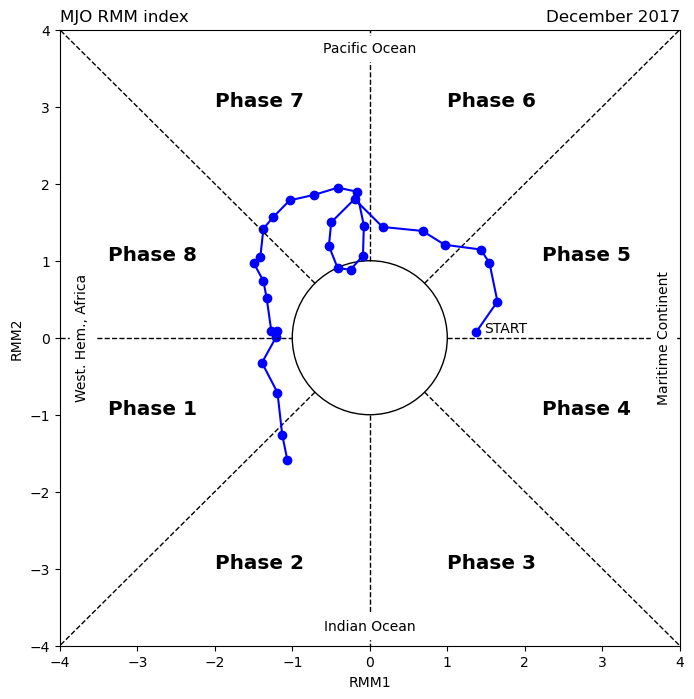

In [3]:
time1 = '2017-12-01'
time2 = '2017-12-31'

fig, ax = plot_mjo_phase_space(figsize=(8,8))

mjo_ds = mjo_ds.sel(T=slice(time1,time2))
    
plot = mjo_ds.plot.scatter(x="RMM1", y="RMM2",ax=ax,color='blue')
plt.plot(mjo_ds.RMM1, mjo_ds.RMM2, color='blue')
ax.text(mjo_ds.RMM1.isel(T=0)+0.1,mjo_ds.RMM2.isel(T=0),'START',ha='left')

ax.set_title('MJO RMM index', loc='left')
ax.set_title('December 2017', loc='right')

plt.show()

## MJO各相位的合成 (Composite) 分析

在Wheeler and Kiladis (2004) 年有關MJO RMM index的論文中，使用到了合成分析的技巧，將8個相位分別挑出來，繪製風場和對流 (OLR) 隨相位的變化。在合成分析中，為了確定平均出來的訊號有意義，通常會使用 **統計檢定** 的技巧。在接下來的範例中，會示範如何將冬季 (DJF) 8個相位的MJO做降雨的合成分析以及統計檢定。

### T test 簡介

This function uses the Student's t-test to test the null hypothesis that the sample means are from the same population (i.e. $H_{0}$ : ave1=ave2). Rejection of the null hypothesis (i.e. acceptance of the alternative hypothesis) indicates that the sample means are from two different populations.

An option is provided to allow for testing when the population variances are assumed to be equal or different. The value(s) returned by `stats.ttest` represent estimates of the statistical significance. Commonly, values of 0.10 or less are used as critical levels of significance. As with any test, caution is advised when interpreting results when there are few samples. Note: the user should specify the critical significance level prior to the calculation.

Source: [NCL website](https://www.ncl.ucar.edu/Document/Functions/Built-in/ttest.shtml). 

### `stats.ttest`用法

最重要的是前面三個引數。

> `scipy.stats.ttest_ind(a, b, axis=0,...)`

`a`和`b`是受試的矩陣，除了`axis`指定的軸之外，其餘的座標軸的大小都要完全一樣。

函數回傳的值有兩個：

> `statistic`:  The calculated t-statistic.  
> `pvalue`: The p-value.

其中`pvalue`才是我們需要的統計顯著性的估計，`pvalue < 0.1`代表通過90%信心水準，`pvalue < 0.05`代表通過95%信心水準，依此類推。

更多細節請見 [scipy網站](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)。


In [4]:
import clim_and_anml as clm

pcp = xr.open_dataarray('data/cmorph_sample.nc').sel(lat=slice(-20,30))
pcpa = pcp.groupby('time.dayofyear') - pcp.groupby('time.dayofyear').mean('time')

mjo_ds = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/dods',
                         decode_times=False)
T = mjo_ds.T.values
mjo_ds['T'] = pd.date_range("1974-06-01", periods=len(T))
mjo_ds = mjo_ds.sel(T=slice('1998-01-01','2021-12-31'))
mjo_djf = mjo_ds.sel(T=mjo_ds.T.dt.month.isin([1,2,12]))

# 用where函數挑出MJO強的相位
mjo_sig = xr.where(mjo_djf.amplitude>=1,  mjo_djf.phase, 0)

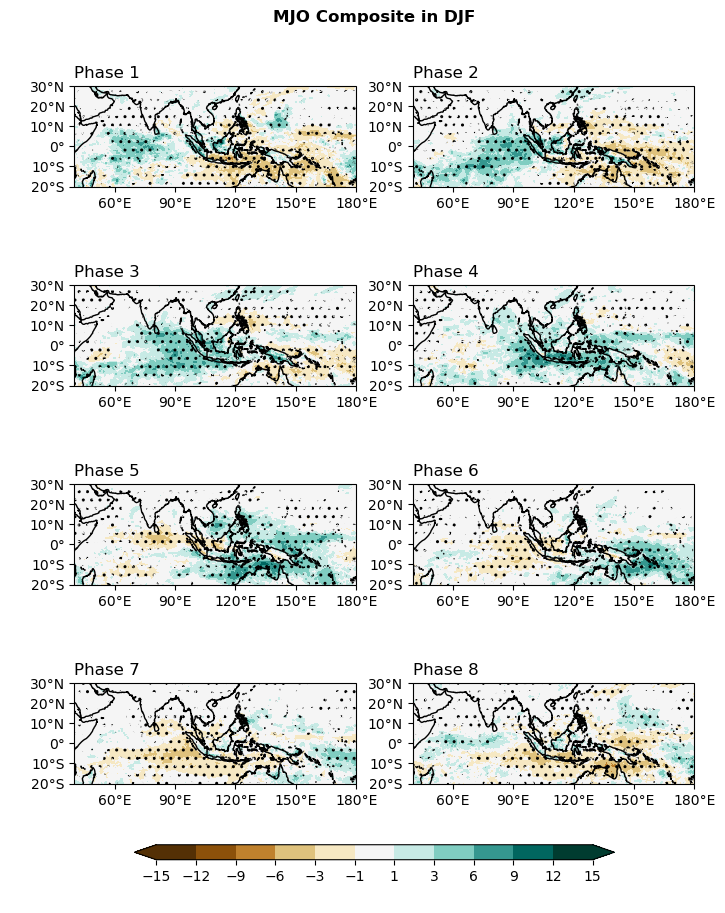

In [5]:
from scipy import stats
import matplotlib as mpl
from matplotlib import pyplot as plt
import cmaps
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig, axes = plt.subplots(4,2, 
                         subplot_kw={'projection': ccrs.PlateCarree()},
                         figsize=(8,10))
ax = axes.flatten()
lon_formatter = LONGITUDE_FORMATTER
lat_formatter = LATITUDE_FORMATTER

clevs = [-15,-12,-9,-6,-3,-1,1,3,6,9,12,15]

for i in range(1,9): 
    mjo_phase = xr.where(mjo_sig==i, mjo_sig, np.nan).dropna(dim='T')
    time = mjo_phase['T']
    
    phase_compo = pcpa.loc[time,:,:]
    phase_compo_mean = phase_compo.mean(axis=0)
    
    # Calculate p value. 
    statistic, pvalue = stats.ttest_ind(a=pcpa.loc[time,:,:], 
                                        b=pcpa.sel(time=pcpa.time.dt.month.isin([1,2,12])), 
                                        axis=0, equal_var=False)
    ttest = phase_compo_mean.copy(data=xr.where(pvalue<0.1,1,0), 
                                  deep=False)
    
    # Plot results. cf: composite mean of precipitation; 
    # ch_hatch: dots represent the region that is significant. 
    cf = (phase_compo_mean.plot.contourf(x='lon',y='lat', ax=ax[i-1],
                                         levels=clevs,
                                         add_colorbar=False,
                                         cmap=cmaps.CBR_drywet, 
                                         extend='both',
                                         transform=ccrs.PlateCarree()))
    cf_hatch = ttest.plot.contourf(x='lon',y='lat', ax=ax[i-1],
                                   levels=[-1.,0.5],
                                   add_colorbar=False,
                                   colors='none',
                                   hatches=[' ','..'],
                                   extend='max',
                                   transform=ccrs.PlateCarree())
    
    ax[i-1].coastlines()
    ax[i-1].set_extent([40,180,-20,30],crs=ccrs.PlateCarree())
    ax[i-1].set_xticks(np.arange(60,210,30), crs=ccrs.PlateCarree())
    ax[i-1].set_yticks(np.arange(-20,40,10), crs=ccrs.PlateCarree())   # 設定x, y座標的範圍，以及多少經緯度繪製刻度。
    ax[i-1].xaxis.set_major_formatter(lon_formatter)
    ax[i-1].yaxis.set_major_formatter(lat_formatter)
    ax[i-1].set_xlabel(' ')
    ax[i-1].set_ylabel(' ')
    ax[i-1].set_title(' ')
    ax[i-1].set_title('Phase '+str(i), loc='left')
    
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.07, 0.6, 0.015])
# Draw the colorbar 將colorbar畫在cbar_ax這個軸上。
cbar = fig.colorbar(cf, cax=cbar_ax,
                    orientation='horizontal',
                    ticks=clevs,
                    label=' ')  

plt.subplots_adjust(hspace=0.15)
plt.suptitle('MJO Composite in DJF',y=0.92,size='large',weight='bold')
plt.show()    